# source : https://www.kaggle.com/datasets/fuarresvij/gdp-growth-around-the-globe

# This data set shows the growth of the GDP for each country in the world from 1960 to 2021. Along with these quantitative data, we have qualitative data regarding the geographical area each of these countries belongs to.

In [76]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statistics
import os

In [13]:
metadata = pd.read_csv("/home/loick/Documents/Data analysis/GDP growth/gdp-metadata.csv")
metadata

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola
...,...,...,...,...,...
260,XKX,Europe & Central Asia,Upper middle income,NaN,Kosovo
261,YEM,Middle East & North Africa,Low income,The World Bank systematically assesses the app...,"Yemen, Rep."
262,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa
263,ZMB,Sub-Saharan Africa,Low income,National accounts data were rebased to reflect...,Zambia


## 1. We need to delete cells that are irrelevant for our purpose, such as "Specialnotes". For this we use the dataframe.drop() method. 

## Once done, let's configure the print() instruction to display all the rows and columns of our dataframe.

## /!\ Our current dataset is not so big. But this has to be avoided when thousands of rows are being dealt with. 

## This visualization is useful to detect the tendencies among the data, i.e. missing values, incorrect format (caracter chain instead of numbers), but is not intended to perform the analysis itself.

In [17]:
metadata_corrected = metadata.drop(columns=['SpecialNotes'])
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
metadata_corrected

,Country Code,Region,IncomeGroup,TableName
0,ABW,Latin America & Caribbean,High income,Aruba
1,AFE,NaN,NaN,Africa Eastern and Southern
2,AFG,South Asia,Low income,Afghanistan
3,AFW,NaN,NaN,Africa Western and Central
4,AGO,Sub-Saharan Africa,Lower middle income,Angola
5,ALB,Europe & Central Asia,Upper middle income,Albania
6,AND,Europe & Central Asia,High income,Andorra
7,ARB,NaN,NaN,Arab World
8,ARE,Middle East & North Africa,High income,United Arab Emirates
9,ARG,Latin America & Caribbean,Upper middle income,Argentina


## We save this corrected dataframe into a csv file

In [97]:
# specify the filename and path for the CSV file
filename = 'metadata_groups.csv'

# save the dataframe to a CSV file with a semicolon separator and UTF-8 encoding
metadata_corrected.to_csv(filename, index=False, sep=';', encoding='utf-8')


## 2. This dataframe sets each country to its geographical area. 

## As such, we can split it up into individual dataframes that gather all the countries belonging to one specific area. 

## This will allow us eventually to perform geographical analysis as well as cluster analysis.

### 2.1. For the sake of example, let's first split our GDP dataframe into individual dataframes according to each geographical area.

### We first sort the values inside our dataframe according to the region.

In [73]:
metadata_sorted = metadata_corrected.sort_values(by='Region', ascending=True)
metadata_sorted

,Country Code,Region,IncomeGroup,TableName
122,KHM,East Asia & Pacific,Lower middle income,Cambodia
162,MNG,East Asia & Pacific,Lower middle income,Mongolia
159,MMR,East Asia & Pacific,Lower middle income,Myanmar
186,PHL,East Asia & Pacific,Lower middle income,Philippines
31,BRN,East Asia & Pacific,High income,Brunei Darussalam
128,LAO,East Asia & Pacific,Lower middle income,Lao PDR
244,TUV,East Asia & Pacific,Upper middle income,Tuvalu
198,PYF,East Asia & Pacific,High income,French Polynesia
96,HKG,East Asia & Pacific,High income,"Hong Kong SAR, China"
163,MNP,East Asia & Pacific,High income,Northern Mariana Islands


### Then, we create the sub-dataframe and enhance the usability of the names in the 'Region' column

In [44]:
metadata_sorted['Region'] = metadata_sorted['Region'].replace(" ", "_", regex=True)
metadata_sorted['Region'] = metadata_sorted['Region'].replace("&", "and", regex=True)
metadata_sorted

,Country Code,Region,IncomeGroup,TableName
122,KHM,East_Asia_and_Pacific,Lower middle income,Cambodia
162,MNG,East_Asia_and_Pacific,Lower middle income,Mongolia
159,MMR,East_Asia_and_Pacific,Lower middle income,Myanmar
186,PHL,East_Asia_and_Pacific,Lower middle income,Philippines
31,BRN,East_Asia_and_Pacific,High income,Brunei Darussalam
128,LAO,East_Asia_and_Pacific,Lower middle income,Lao PDR
244,TUV,East_Asia_and_Pacific,Upper middle income,Tuvalu
198,PYF,East_Asia_and_Pacific,High income,French Polynesia
96,HKG,East_Asia_and_Pacific,High income,"Hong Kong SAR, China"
163,MNP,East_Asia_and_Pacific,High income,Northern Mariana Islands


In [74]:
metadata_groups = metadata_sorted.groupby('Region')
metadata_groups

## It would be interesting now to plot all our dataframe on a graph. We use seaborn for this purpose. Thanks to this, we will be able to visualize better the distribution of the income categories according to the region.

<AxesSubplot:xlabel='Region', ylabel='TableName'>

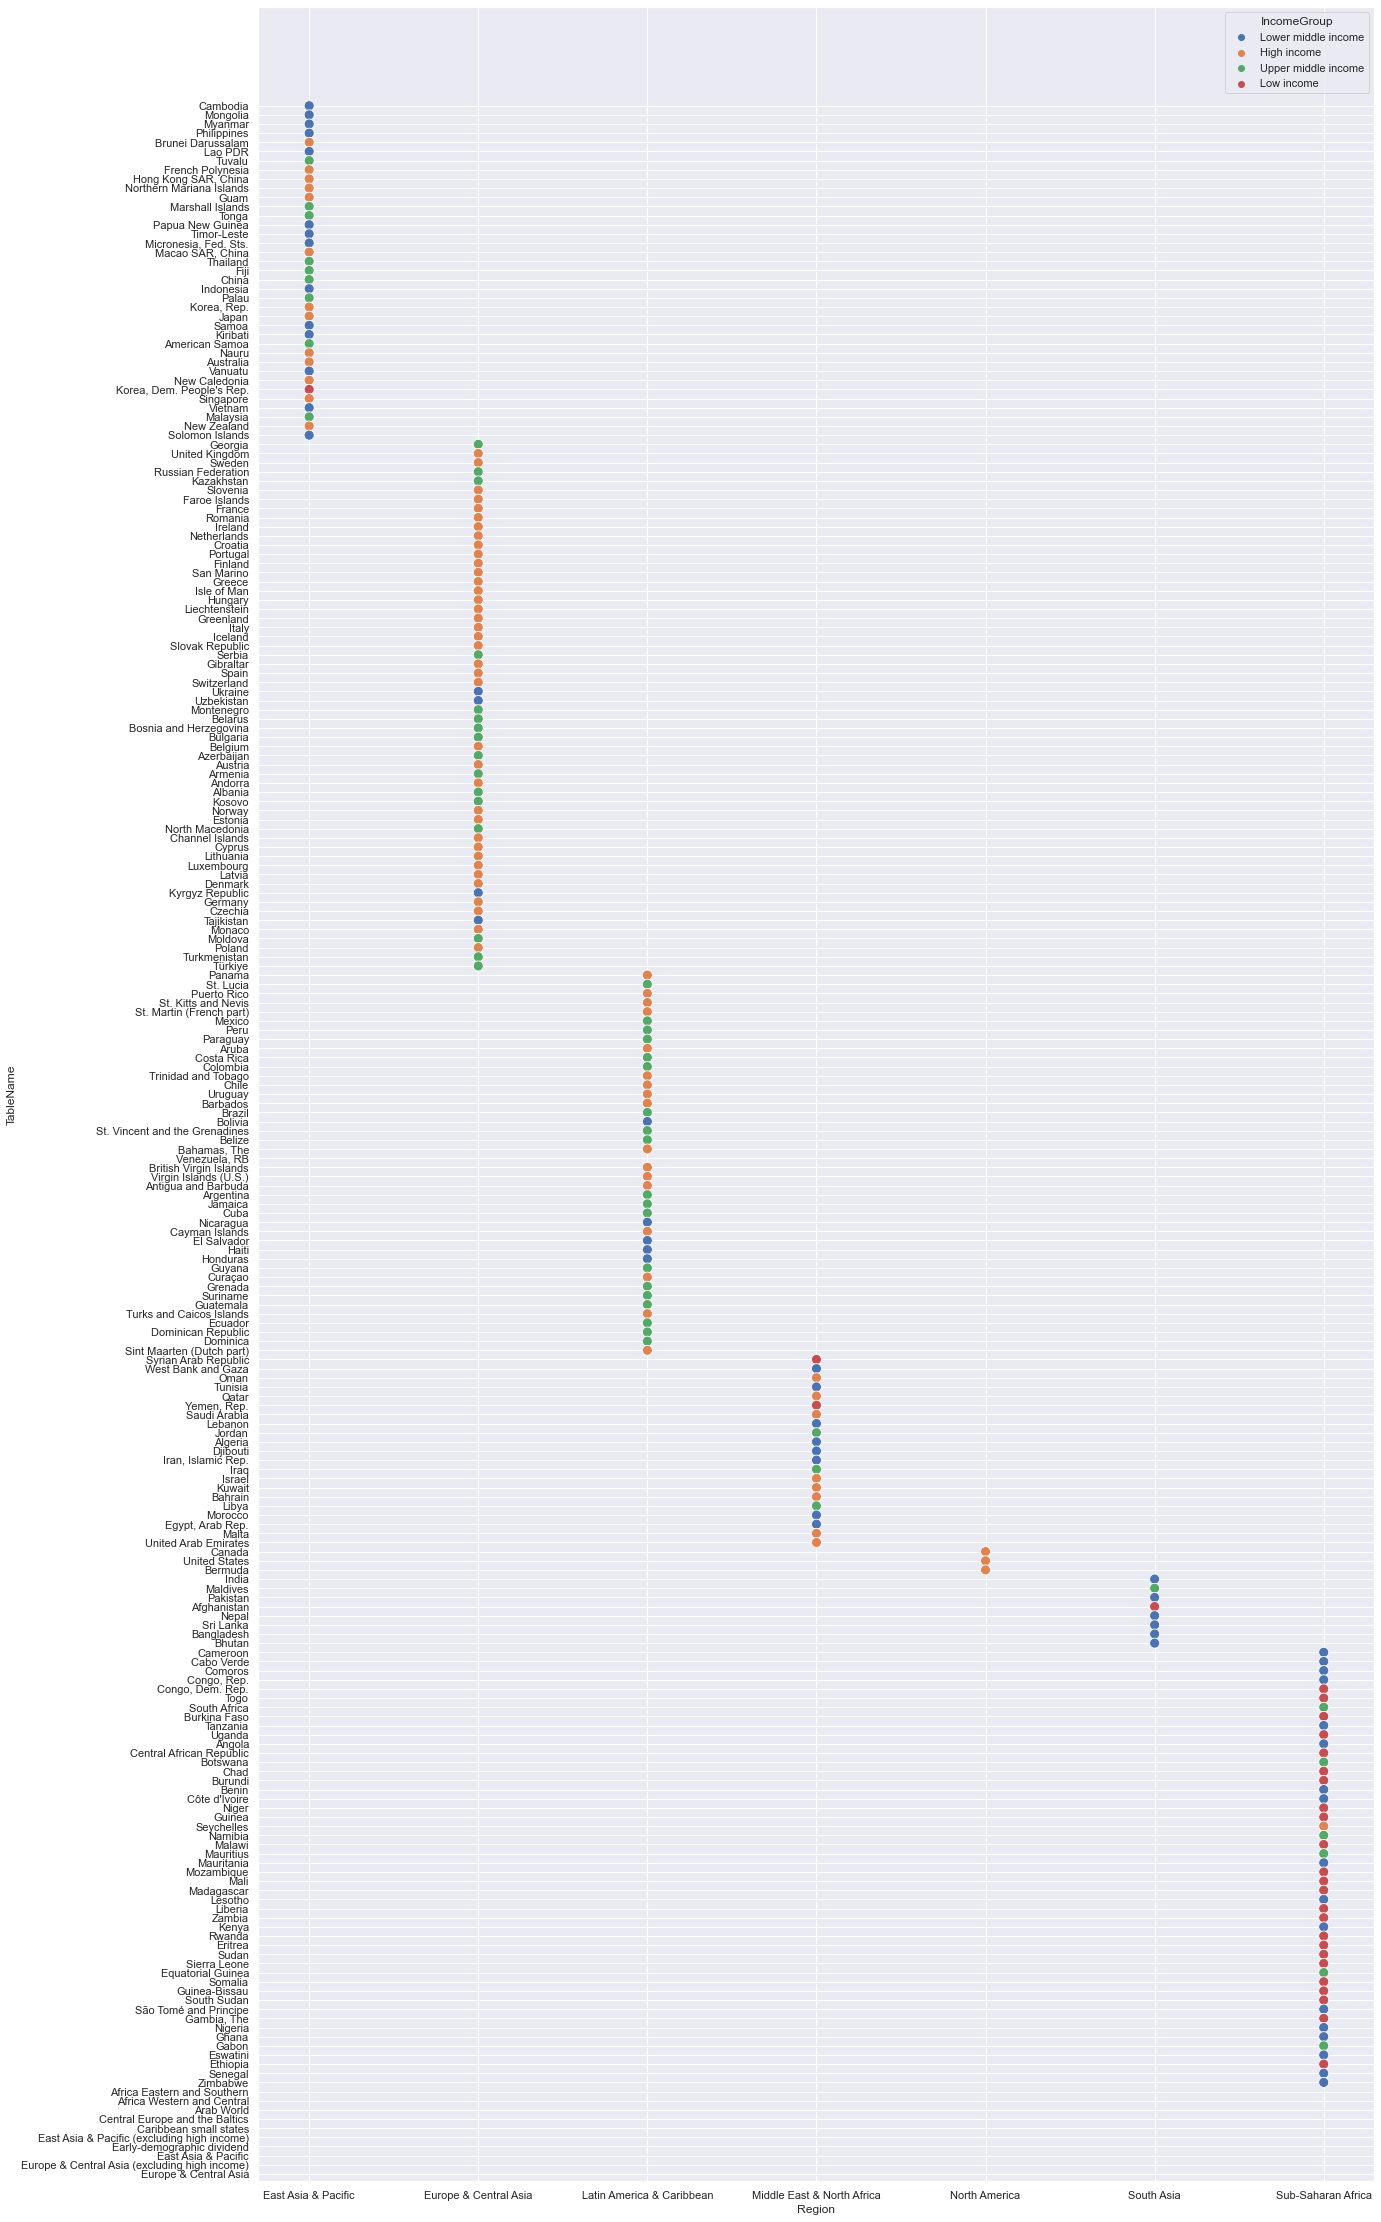

In [124]:
# create a scatter plot with the income category as the hue
plt.figure(figsize=(20,40))
sns.scatterplot(x='Region', y='TableName', hue = 'IncomeGroup', s=100, data = metadata_sorted)

## Identifying the colors, we can notice that one category of income tends to appear frequently in one specific area. How can we confirm this first glance ?

## 2.2 For this, we need to know : how many countries of each geographical area do we have in each category of income ?

## First let's count how many countries we have for each region

In [126]:
# Assuming that your dataframe is called "df" and has a column called "area"

# Group the data by area and count the number of rows in each group
region_counts = metadata_sorted.groupby('Region').size().reset_index(name='count')

# Print the resulting dataframe
print(region_counts)

                       Region  count
0         East Asia & Pacific     37
1       Europe & Central Asia     58
2   Latin America & Caribbean     42
3  Middle East & North Africa     21
4               North America      3
5                  South Asia      8
6          Sub-Saharan Africa     48


## Now, we want to know how many times each category of income appears for each region.
## The output should be expressed as follows : " In #Region, 20 countries have #IncomeGroup "

In [127]:
income_counts = metadata_sorted.groupby(['Region', 'IncomeGroup']).size().reset_index(name='count')
print(income_counts)

                        Region          IncomeGroup  count
0          East Asia & Pacific          High income     13
1          East Asia & Pacific           Low income      1
2          East Asia & Pacific  Lower middle income     14
3          East Asia & Pacific  Upper middle income      9
4        Europe & Central Asia          High income     38
5        Europe & Central Asia  Lower middle income      4
6        Europe & Central Asia  Upper middle income     16
7    Latin America & Caribbean          High income     17
8    Latin America & Caribbean  Lower middle income      5
9    Latin America & Caribbean  Upper middle income     19
10  Middle East & North Africa          High income      8
11  Middle East & North Africa           Low income      2
12  Middle East & North Africa  Lower middle income      8
13  Middle East & North Africa  Upper middle income      3
14               North America          High income      3
15                  South Asia           Low income     

## Now we have the distribution of each category of income for each region. 

## We can ask ourselves further : which area has the highest number of high income ? 

In [128]:
# Group the data by region and income, and count the number of rows in each group
income_counts = metadata_sorted.groupby(['Region', 'IncomeGroup']).size().reset_index(name='count')

# Filter the data to include only rows where the income is "high"
high_income_counts = income_counts[income_counts['IncomeGroup'] == 'High income']

# Find the region with the highest number of high incomes
max_region = high_income_counts['count'].idxmax()

# Extract the row with the highest number of high incomes
max_row = high_income_counts.loc[max_region]

# Print the region with the highest number of high incomes
print(max_row['Region'])

Europe & Central Asia


## Of low income ?

In [130]:
# Group the data by region and income, and count the number of rows in each group
income_counts = metadata_sorted.groupby(['Region', 'IncomeGroup']).size().reset_index(name='count')

# Filter the data to include only rows where the income is "high"
low_income_counts = income_counts[income_counts['IncomeGroup'] == 'Low income']

# Find the region with the highest number of high incomes
min_region = low_income_counts['count'].idxmax()

# Extract the row with the highest number of high incomes
min_row = low_income_counts.loc[min_region]

# Print the region with the highest number of high incomes
print(min_row['Region'])

Sub-Saharan Africa


## Let's automate this research. With a 'for' loop, we are going to  find the region with the highest number of each income category.

In [133]:
# Group the data by region and income, and count the number of rows in each group
income_counts = metadata_sorted.groupby(['Region', 'IncomeGroup']).size().reset_index(name='count')

# Create a list of the income categories
income_categories = ['Low income', 'Lower middle income', 'Upper middle income', 'High income']

# Iterate over the income categories
for income in income_categories:
    # Filter the data to include only rows where the income is the current category
    income_counts_by_category = income_counts[income_counts['IncomeGroup'] == income]
    
    # Find the region with the highest number of incomes in the current category
    max_region = income_counts_by_category['count'].idxmax()
    
    # Extract the row with the highest number of incomes in the current category
    max_row = income_counts_by_category.loc[max_region]
    
    # Print the region with the highest number of incomes in the current category
    print(f'The region with the highest number of {income} is {max_row["Region"]}')


The region with the highest number of Low income is Sub-Saharan Africa
The region with the highest number of Lower middle income is Sub-Saharan Africa
The region with the highest number of Upper middle income is Latin America & Caribbean
The region with the highest number of High income is Europe & Central Asia


# Conclusion and further analysis

### After applying some changes to our original dataframe, we were able to the categories of income according to the region.

### After which, we sought to crunch the numbers of each category of income. 

### We reached conclusions as of which regions is, from this data deduced, the richest and the poorest. 

### The richest region is "Europe & Central Asia " because it contains the highest number of high incomes. The poorest region is "Sub-saharian Africa" because it has the highest number of low incomes.

### A nice further research could focus on the reasons for this gap, but our data isn't suitable for such.